# Loan Default Analysis and Prediction


In [1]:
# We import the libraries we will need.
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
#pd.set_option("max_rows",None)

plt.rcParams['figure.figsize'] = [10,7]

# Print multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Import library to hide warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# License - CC0: Public Domain
# Domain - Public
# Sources - Kaggle
# Dataset owner - Gaurav Dutta
# Date created - 2020-07-30
# The Problem Statement - To know which client is more likely to default

# We'll load the data set and create an object for it
df = pd.read_csv("application_data.csv")

In [3]:
# We take a look at the data and try to get an initial sense for it
print(f'The number of rows and columns is {df.shape}')
df.head()

# Show all column names 
df.info(verbose=True,null_counts=True)

The number of rows and columns is (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [4]:
# We significant variability in the number of values for each column from avbove
# Let's see the Percentage of null values in each column
percentNull = df.isnull().sum()*100 /len(df)
# We see a list of the top 45 columns with Null values
percentNull.sort_values(ascending = False).head(45)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [5]:
# Create an object of all the columns having null values that occupy more than 40% of the records
top_null_columns = percentNull[percentNull>40].index
top_null_columns
# Now we will remove those columns from the dataframe
df.drop(top_null_columns, axis=1, inplace=True)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [6]:
# We will also remove the "Flag_Document" columns since they have no meaning for us
col = list(df.columns)
flag = []
for i in col:
    # The .+ symbol is used in place of * symbol
    if re.search("FLAG_DOCUMENT.+", i): 
        flag.append(i)
df.drop(flag, axis=1, inplace=True)

#We will drop other unnecessary columns that will likely not be usefull, overcomplicate,
# and potentially cause over fitting of the model due to a complex feature space.
df.drop([
"EXT_SOURCE_3","EXT_SOURCE_2","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE",
    "FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","DAYS_REGISTRATION","DAYS_ID_PUBLISH",
"REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"],inplace=True,axis=1)

In [7]:
# This is the dataset shape now
df.shape
# We will look at the remaining columns and the percentage of Null records in them
percentNull = df.isnull().sum()*100/len(df)
percentNull.sort_values(ascending = False).head(15)

(307511, 39)

OCCUPATION_TYPE               31.345545
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
NAME_TYPE_SUITE                0.420148
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
dtype: float64

# 
We see that 31% of the occupation_type is null. There is no reasonable way to impute this without creating significant distortions. Several plausable imputations can be thought of, but are too risky. Therefore, we will fill the null values with "unknown," since the nulls may be unemployed, pensioners, or just errors. 

In [8]:
# Filling the null values in the occupation_type column
df["OCCUPATION_TYPE"].fillna("Unknown",inplace=True)

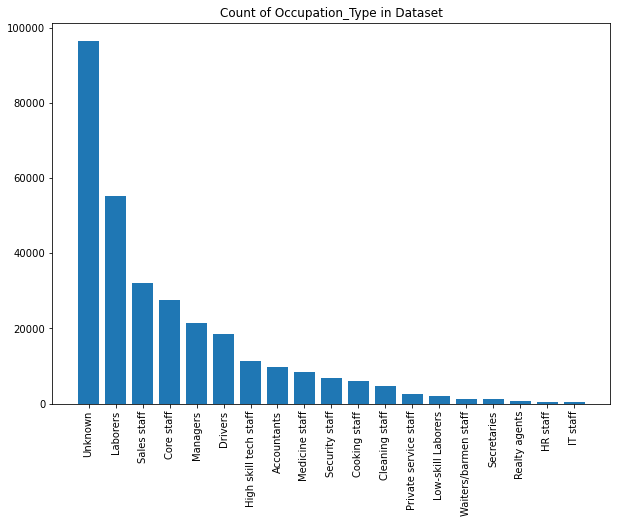

In [9]:
# Lets visualize and explore the OCCUPATION_TYPE column
occupationCount = df.OCCUPATION_TYPE.value_counts()
occupationCount = occupationCount.to_frame().reset_index()
occupationCount.rename(columns={"index":"OCCUPATION_TYPE","OCCUPATION_TYPE":"VALUE_COUNTS"})

plt.bar(occupationCount.iloc[:,0],occupationCount.iloc[:,1])
plt.xticks(rotation=90)
plt.title("Count of Occupation_Type in Dataset")
plt.show();

In [10]:
# We will now look at the rest of the top columns with null records
percentNull = df.isnull().sum()*100/len(df)
percentNull.sort_values(ascending = False).head(10)

AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
dtype: float64

#
As we can see, the 6 AMT_REQ_CREDIT_BUREAU columns which list the number of enquiries to the Credit Bureau about the client, X time before the application, all have the same percentage of values as null. We will therefore look at the values and their count in these columns and see if we can get a better understanding.


In [11]:
# We look at values and their count in the AMT_REQ_CREDIT_BUREAU coulmns
# Note that all columns had 0 as the most common value. (Commented out for sapce)

df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()
#df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()
#df.AMT_REQ_CREDIT_BUREAU_MON.value_counts()
# df.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()
# df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()
# df.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()


0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

#
Zero is the most common value in all columns. This means that the person has not had a credit check in the last period and that this lending institution is likely the first place the person is going to for a loan. Because it is the mode, and since sometimes null is conflated with zero in datasets, we will fill all these null values with zero 

In [12]:
# Filling the null values in the AMT_REQ_CREDIT_BUREAU columns
df["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0,inplace=True)
df["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0,inplace=True)
df["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0,inplace=True)
df["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0,inplace=True)
df["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0,inplace=True)
df["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0,inplace=True)

In [13]:
# We will now look again at the top columns with Null records
percentNull = df.isnull().sum()*100/len(df)
percentNull.sort_values(ascending = False).head(10)

NAME_TYPE_SUITE               0.420148
DEF_60_CNT_SOCIAL_CIRCLE      0.332021
OBS_30_CNT_SOCIAL_CIRCLE      0.332021
DEF_30_CNT_SOCIAL_CIRCLE      0.332021
OBS_60_CNT_SOCIAL_CIRCLE      0.332021
AMT_GOODS_PRICE               0.090403
AMT_ANNUITY                   0.003902
CNT_FAM_MEMBERS               0.000650
DAYS_LAST_PHONE_CHANGE        0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    0.000000
dtype: float64

#
We see that the highest percentage of null values is 0.42% of null values. While statistical imputation methods could be applied to eliminate the null values, this would require further exploration for each column. Since we have more than enough records in this dataset for our purposes, we will just drop all records with null values for the remaining columns with minimal effect on the dataset size.

In [14]:
# Taking initial dataset shape before removing null records
before = df.shape
# Removing null records from dataset
df.dropna(axis=0, how='any',inplace=True)
# Taking dataset shape after removing null records to determine how much was lost
after = df.shape
#calculating and printing how many records were dropped
lost = (before[0])-(after[0])

print("We lost " + str(lost) + " records from the dataset and our new dataset shape is: " + str(after))


We lost 2326 records from the dataset and our new dataset shape is: (305185, 39)


In [15]:
# Now we take a look at the remaining columns, their Dtype, and see that there are no more Null values 
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305185 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305185 non-null  int64  
 1   TARGET                       305185 non-null  int64  
 2   NAME_CONTRACT_TYPE           305185 non-null  object 
 3   CODE_GENDER                  305185 non-null  object 
 4   FLAG_OWN_CAR                 305185 non-null  object 
 5   FLAG_OWN_REALTY              305185 non-null  object 
 6   CNT_CHILDREN                 305185 non-null  int64  
 7   AMT_INCOME_TOTAL             305185 non-null  float64
 8   AMT_CREDIT                   305185 non-null  float64
 9   AMT_ANNUITY                  305185 non-null  float64
 10  AMT_GOODS_PRICE              305185 non-null  float64
 11  NAME_TYPE_SUITE              305185 non-null  object 
 12  NAME_INCOME_TYPE             305185 non-null  object 
 13 

In [16]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,305185.000000,305185.000000,305185.000000,3.051850e+05,3.051850e+05,305185.000000,3.051850e+05,305185.000000,305185.000000,305185.000000,...,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000,305185.000000
mean,278164.198650,0.080997,0.417150,1.686140e+05,5.992816e+05,27136.759613,5.382271e+05,0.020844,-16041.650124,63875.190770,...,0.143395,1.404692,0.100025,-965.038731,0.005515,0.006055,0.029828,0.231479,0.229942,1.647558
std,102784.522248,0.272831,0.722267,2.376652e+05,4.020170e+05,14476.069729,3.689286e+05,0.013808,4362.501707,141327.264383,...,0.446700,2.379826,0.362290,826.886059,0.077894,0.102922,0.190915,0.856023,0.745198,1.856382
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189129.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,-19685.000000,-2761.000000,...,0.000000,0.000000,0.000000,-1572.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278189.000000,0.000000,0.000000,1.458000e+05,5.147775e+05,24939.000000,4.500000e+05,0.018850,-15756.000000,-1214.000000,...,0.000000,0.000000,0.000000,-760.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367120.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34618.500000,6.795000e+05,0.028663,-12420.000000,-289.000000,...,0.000000,2.000000,0.000000,-276.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [19]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# # X, y = df(return_X_y=True)

# X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

<Figure size 2160x1800 with 0 Axes>

<AxesSubplot:>

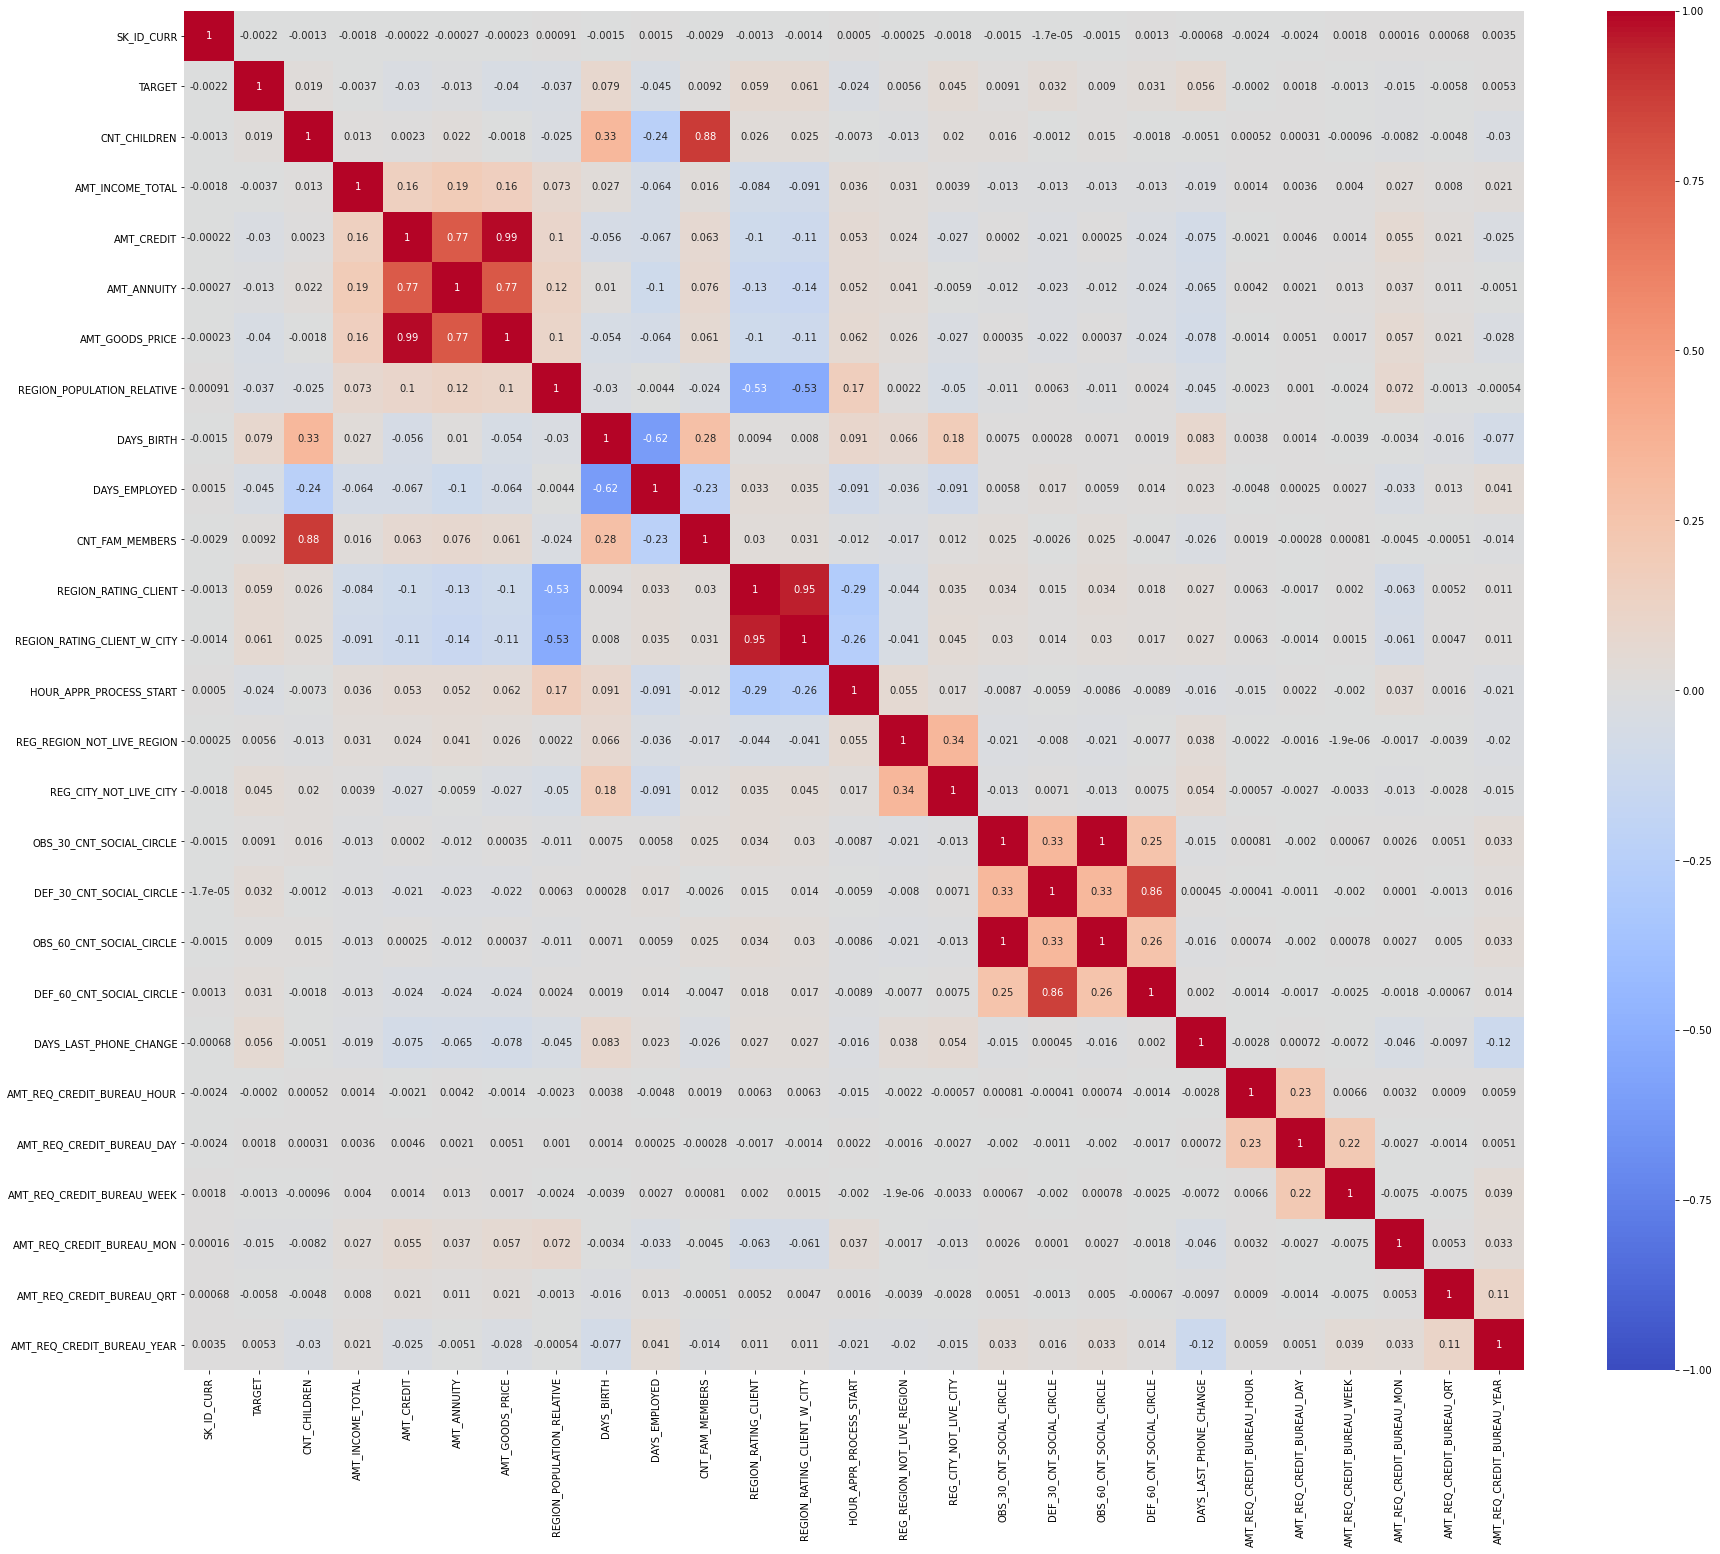

In [20]:
# Check the correlation between all variables
# There are some highly correlated variables
plt.figure(figsize=(30, 25))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305185 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305185 non-null  int64  
 1   TARGET                       305185 non-null  int64  
 2   NAME_CONTRACT_TYPE           305185 non-null  object 
 3   CODE_GENDER                  305185 non-null  object 
 4   FLAG_OWN_CAR                 305185 non-null  object 
 5   FLAG_OWN_REALTY              305185 non-null  object 
 6   CNT_CHILDREN                 305185 non-null  int64  
 7   AMT_INCOME_TOTAL             305185 non-null  float64
 8   AMT_CREDIT                   305185 non-null  float64
 9   AMT_ANNUITY                  305185 non-null  float64
 10  AMT_GOODS_PRICE              305185 non-null  float64
 11  NAME_TYPE_SUITE              305185 non-null  object 
 12  NAME_INCOME_TYPE             305185 non-null  object 
 13 

In [30]:
# defining our variables
X = df.iloc[:,6:10]
y = df.iloc[:,1]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [39]:
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[68922  1225]
 [ 5945   205]]


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[68693  1454]
 [ 5931   219]]


In [40]:
def metrix_report(y_test, y_pred):
    from sklearn.metrics import classification_report

    target_names = ["class 0", "class 1"]
    return classification_report(y_test, y_pred, target_names=target_names)
metrix_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n     class 0       0.92      0.98      0.95     70147\n     class 1       0.14      0.03      0.05      6150\n\n    accuracy                           0.91     76297\n   macro avg       0.53      0.51      0.50     76297\nweighted avg       0.86      0.91      0.88     76297\n'

In [37]:
def metrix_report(y_test, y_pred):
    from sklearn.metrics import classification_report

    target_names = ["class 0", "class 1"]
    return classification_report(y_test, y_pred, target_names=target_names)
metrix_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n     class 0       0.92      0.98      0.95     70147\n     class 1       0.13      0.04      0.06      6150\n\n    accuracy                           0.90     76297\n   macro avg       0.53      0.51      0.50     76297\nweighted avg       0.86      0.90      0.88     76297\n'

In [35]:
(68693 +219)/(68693 + 1454 +5931+ 219)*100

90.32072034287062

In [36]:
X
y

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,0,202500.0,406597.5,24700.5
1,0,270000.0,1293502.5,35698.5
2,0,67500.0,135000.0,6750.0
3,0,135000.0,312682.5,29686.5
4,0,121500.0,513000.0,21865.5
...,...,...,...,...
307506,0,157500.0,254700.0,27558.0
307507,0,72000.0,269550.0,12001.5
307508,0,153000.0,677664.0,29979.0
307509,0,171000.0,370107.0,20205.0


0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 305185, dtype: int64

Don't do forward fill because oit may be dependant on other feturss.

Fill with zero the rest of beuro
Fill with unknown or unemployed the occupation nulls